In [ ]:
#import the required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Reading the csv file
data_book = pd.read_csv('/content/book (1).csv',encoding='latin-1')
data_book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
data_book.shape

(2000, 11)

In [ ]:
data_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


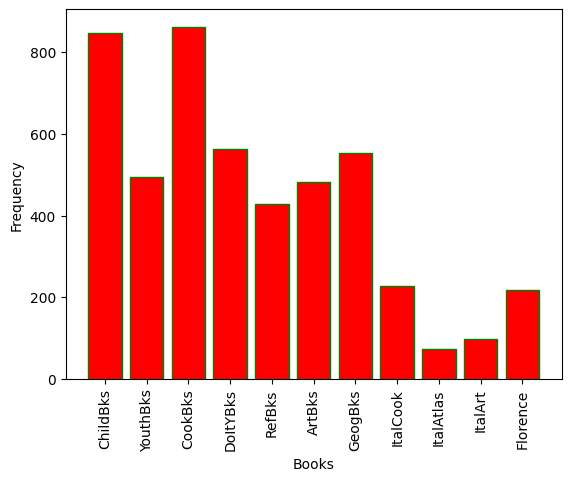

In [ ]:
# Visualizing the frequency for the different book categories
plt.bar (data_book.columns ,data_book.sum(axis=0),edgecolor='green',color='red')
plt.xticks(rotation = 90)
plt.xlabel("Books")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Implementing an apriori algorithm
book_sales1 = apriori(data_book, min_support=0.1, use_colnames=True)
book_sales1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


Constructing an association model, using lift as the evaluation metric

In [ ]:
rules1 = association_rules(book_sales1, metric="lift", min_threshold=0.8)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
96,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
97,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,0.726961
98,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355


 Sorting : books based on the association rule with respect to lift criteria

In [ ]:
rules1.sort_values('lift',ascending = False,inplace=True)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406,1.000000
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
77,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
80,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
85,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
...,...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
12,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678,0.600225
13,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856


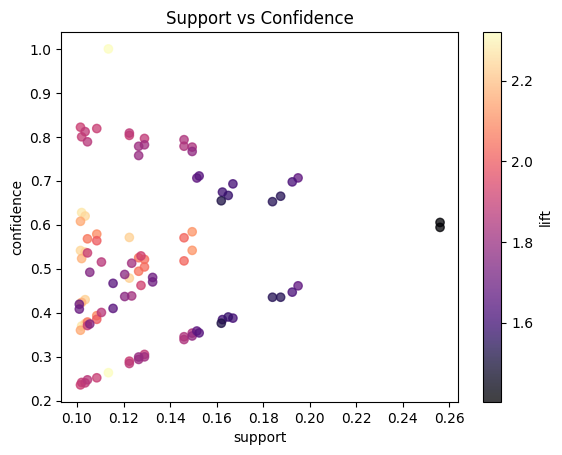

In [ ]:
# Scatter plot for support and confidence for the first association role, with respect to Lift criteria
plt.scatter(rules1['support'], rules1['confidence'],c=rules1['lift'],cmap= 'magma',alpha=0.75)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
cbar=plt.colorbar()
cbar.set_label('lift')
plt.show()

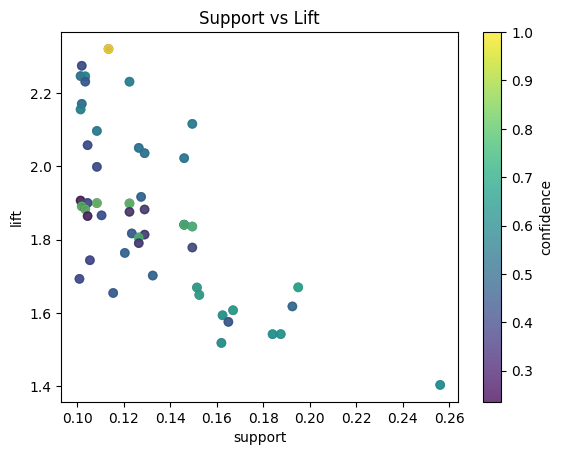

In [ ]:
# Scatter plot for support and lift for the first association role, with respect to Confidence criteria
plt.scatter(rules1["support"], rules1["lift"],c=rules1['confidence'],alpha=0.75)
plt.xlabel("support")
plt.ylabel("lift")
plt.title("Support vs Lift")
cbar=plt.colorbar()
cbar.set_label('confidence')
plt.show()

In [ ]:
#Checking the Associated books for the category, "ChildBooks"
bookname='ChildBks'
rules1_ChildBks =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_ChildBks,["antecedents","consequents"]]

,antecedents,consequents
77,"(ArtBks, ChildBks)",(GeogBks)
54,"(CookBks, ChildBks)",(RefBks)
78,"(GeogBks, ChildBks)",(ArtBks)
65,"(CookBks, ChildBks)",(GeogBks)
71,"(DoItYBks, ChildBks)",(GeogBks)
60,"(CookBks, ChildBks)",(ArtBks)
41,"(CookBks, ChildBks)",(YouthBks)
48,"(CookBks, ChildBks)",(DoItYBks)
72,"(GeogBks, ChildBks)",(DoItYBks)
57,(ChildBks),"(RefBks, CookBks)"


In [ ]:
#Checking the Associated books for the category, "YouthBooks"
bookname='YouthBks'
rules1_YouthBks =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_YouthBks,["antecedents","consequents"]]

,antecedents,consequents
44,(YouthBks),"(CookBks, ChildBks)"
40,"(CookBks, YouthBks)",(ChildBks)
42,"(YouthBks, ChildBks)",(CookBks)
18,(YouthBks),(GeogBks)
17,(YouthBks),(ArtBks)
15,(YouthBks),(DoItYBks)
0,(YouthBks),(ChildBks)
13,(YouthBks),(CookBks)


In [ ]:
#Checking the Associated books for the category, CookBks
bookname='CookBks'
rules1_CookBks =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_CookBks,["antecedents","consequents"]]

,antecedents,consequents
29,(CookBks),(ItalCook)
84,"(DoItYBks, CookBks)",(ArtBks)
94,"(ArtBks, CookBks)",(GeogBks)
96,"(CookBks, GeogBks)",(ArtBks)
54,"(CookBks, ChildBks)",(RefBks)
83,"(ArtBks, CookBks)",(DoItYBks)
65,"(CookBks, ChildBks)",(GeogBks)
88,"(DoItYBks, CookBks)",(GeogBks)
60,"(CookBks, ChildBks)",(ArtBks)
41,"(CookBks, ChildBks)",(YouthBks)


In [ ]:
# Checking the Associated books for the category, DoItYBks
bookname='DoItYBks'
rules1_DoItYBks =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_DoItYBks,["antecedents","consequents"]]

,antecedents,consequents
84,"(DoItYBks, CookBks)",(ArtBks)
86,(DoItYBks),"(ArtBks, CookBks)"
88,"(DoItYBks, CookBks)",(GeogBks)
71,"(DoItYBks, ChildBks)",(GeogBks)
49,(DoItYBks),"(CookBks, ChildBks)"
91,(DoItYBks),"(CookBks, GeogBks)"
82,"(DoItYBks, ArtBks)",(CookBks)
73,(DoItYBks),"(GeogBks, ChildBks)"
89,"(DoItYBks, GeogBks)",(CookBks)
70,"(DoItYBks, GeogBks)",(ChildBks)


In [ ]:
#  Checking the Associated books for the category, RefBks
bookname='RefBks'
rules1_RefBks =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_RefBks,["antecedents","consequents"]]

,antecedents,consequents
55,(RefBks),"(CookBks, ChildBks)"
52,"(RefBks, CookBks)",(ChildBks)
53,"(RefBks, ChildBks)",(CookBks)
36,(RefBks),(GeogBks)
30,(RefBks),(DoItYBks)
6,(RefBks),(ChildBks)
22,(RefBks),(CookBks)


In [ ]:
# Checking the Associated books for the category, ArtBks
bookname='ArtBks'
rules1_ArtBks =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_ArtBks,["antecedents","consequents"]]

,antecedents,consequents
77,"(ArtBks, ChildBks)",(GeogBks)
85,(ArtBks),"(DoItYBks, CookBks)"
94,"(ArtBks, CookBks)",(GeogBks)
97,(ArtBks),"(CookBks, GeogBks)"
79,(ArtBks),"(GeogBks, ChildBks)"
83,"(ArtBks, CookBks)",(DoItYBks)
61,(ArtBks),"(CookBks, ChildBks)"
38,(ArtBks),(GeogBks)
82,"(DoItYBks, ArtBks)",(CookBks)
76,"(ArtBks, GeogBks)",(ChildBks)


In [ ]:
#  Checking the Associated books for the category, GeogBks
bookname='GeogBks'
rules1_GeogBks =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_GeogBks,["antecedents","consequents"]]

,antecedents,consequents
80,(GeogBks),"(ArtBks, ChildBks)"
99,(GeogBks),"(ArtBks, CookBks)"
96,"(CookBks, GeogBks)",(ArtBks)
78,"(GeogBks, ChildBks)",(ArtBks)
68,(GeogBks),"(CookBks, ChildBks)"
93,(GeogBks),"(DoItYBks, CookBks)"
74,(GeogBks),"(DoItYBks, ChildBks)"
90,"(CookBks, GeogBks)",(DoItYBks)
39,(GeogBks),(ArtBks)
72,"(GeogBks, ChildBks)",(DoItYBks)


In [ ]:
#  Checking the Associated books for the category, ItalCook
bookname='ItalCook'
rules1_ItalCook =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_ItalCook,["antecedents","consequents"]]

,antecedents,consequents
28,(ItalCook),(CookBks)


In [ ]:
#  Checking the Associated books for the category, ItalAtlas
bookname='ItalAtlas'
rules1_ItalAtlas =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_ItalAtlas,["antecedents","consequents"]]

,antecedents,consequents


In [ ]:
#  Checking the Associated books for the category, ItalArt
bookname='ItalArt'
rules1_ItalArt =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_ItalArt,["antecedents","consequents"]]

,antecedents,consequents


In [ ]:
#  Checking the Associated books for the category,  Florence
bookname='Florence'
rules1_Florence =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_Florence,["antecedents","consequents"]]

,antecedents,consequents


In [ ]:
# Model2-Create another association rule by taking different length in Apriori rule and diffrent minimum support
book_sales2 = apriori(data_book, min_support=0.15, use_colnames=True)
book_sales2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(YouthBks, ChildBks)"
8,0.2560,"(CookBks, ChildBks)"
9,0.1840,"(DoItYBks, ChildBks)"


In [ ]:
rules2 = association_rules(book_sales2, metric="lift", min_threshold=0.8)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
5,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818,0.695146
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427,0.490986
9,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464,0.645855


In [ ]:
rules2.sort_values('lift',ascending = False,inplace=True)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
11,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211,0.695481
10,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074,0.554271
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818,0.695146
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
17,(CookBks),(RefBks),0.4310,0.2145,0.1525,0.353828,1.649549,0.060050,1.215621,0.692045
16,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556,0.501303
20,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361,0.671435
21,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766,0.527689
18,(ArtBks),(CookBks),0.2410,0.4310,0.1670,0.692946,1.607763,0.063129,1.853095,0.498047
19,(CookBks),(ArtBks),0.4310,0.2410,0.1670,0.387471,1.607763,0.063129,1.239125,0.664355


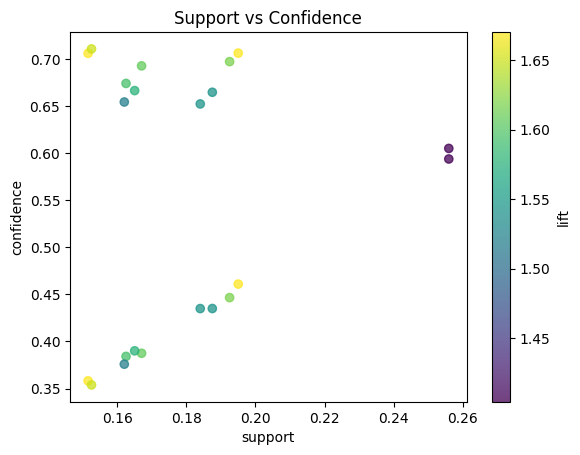

In [ ]:
# Scatter plot for support and confidence of second association rule
plt.scatter(rules2['support'], rules2['confidence'],c=rules2['lift'],cmap= 'viridis',alpha=0.75)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
cbar=plt.colorbar()
cbar.set_label('lift')
plt.show()

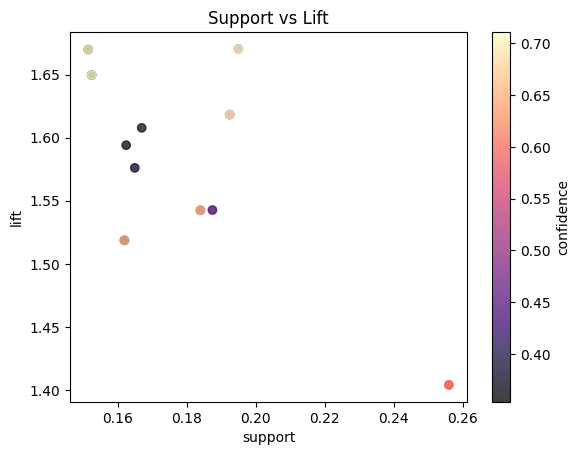

In [ ]:
# Scatter plot for support and lift of second association rule
plt.scatter(rules2["support"], rules2["lift"],c=rules2['confidence'],cmap= 'magma',alpha=0.75)
plt.xlabel("support")
plt.ylabel("lift")
plt.title("Support vs Lift")
cbar=plt.colorbar()
cbar.set_label('confidence')
plt.show()

In [ ]:
# Model3-Creating another association rule by taking different length in Apriori
book_sales3 = apriori(data_book, min_support=0.05, use_colnames=True)
book_sales3

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(DoItYBks, CookBks, YouthBks, GeogBks)"
96,0.0560,"(ArtBks, CookBks, YouthBks, GeogBks)"
97,0.0650,"(ArtBks, DoItYBks, CookBks, GeogBks)"
98,0.0510,"(DoItYBks, GeogBks, CookBks, YouthBks, ChildBks)"


In [ ]:
rules3 = association_rules(book_sales3, metric="lift", min_threshold=0.8)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
657,(DoItYBks),"(ArtBks, ChildBks, GeogBks, CookBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085,0.779762
658,(GeogBks),"(ArtBks, DoItYBks, ChildBks, CookBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733,0.796923
659,(ArtBks),"(DoItYBks, ChildBks, GeogBks, CookBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939,0.789307
660,(CookBks),"(ArtBks, DoItYBks, GeogBks, ChildBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789,0.915050


In [ ]:
# Sorting values- based on the lift metric
rules3.sort_values('lift',ascending = False,inplace=True)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
183,(ItalCook),"(CookBks, YouthBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193,0.776487
182,"(CookBks, YouthBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301,0.821427
511,"(CookBks, GeogBks)","(ItalCook, ChildBks)",0.1925,0.0850,0.0525,0.272727,3.208556,0.036137,1.258125,0.852425
510,"(ItalCook, ChildBks)","(CookBks, GeogBks)",0.0850,0.1925,0.0525,0.617647,3.208556,0.036137,2.111923,0.752277
509,"(ItalCook, GeogBks)","(CookBks, ChildBks)",0.0640,0.2560,0.0525,0.820312,3.204346,0.036116,4.140522,0.734961
...,...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
14,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678,0.600225
15,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856


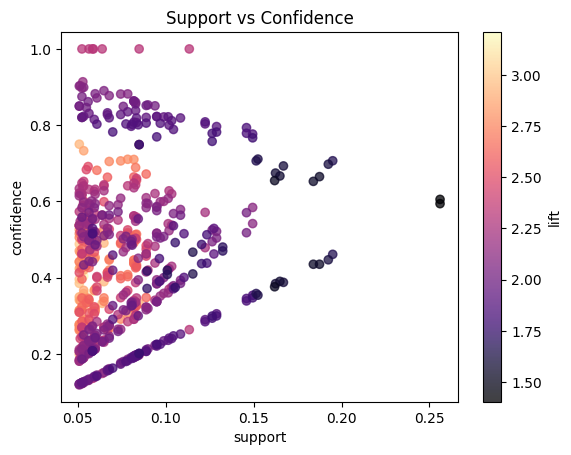

In [ ]:
# Scatter plot - Support vs confidence
plt.scatter(rules3['support'], rules3['confidence'],c=rules3['lift'],cmap= 'magma',alpha=0.75)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
cbar=plt.colorbar()
cbar.set_label('lift')
plt.show()

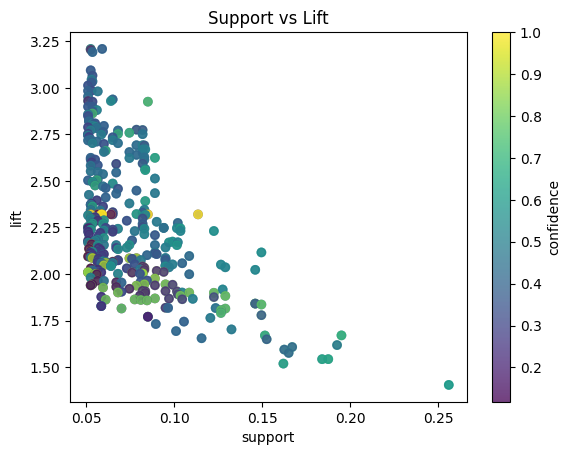

In [ ]:
# Scatter plot - Support vs lift
plt.scatter(rules3["support"], rules3["lift"],c=rules3['confidence'],alpha=0.75)
plt.xlabel("support")
plt.ylabel("lift")
plt.title("Support vs Lift")
cbar=plt.colorbar()
cbar.set_label('confidence')
plt.show()

In [ ]:
# Consildating the results
t={'Association rule':pd.Series(['Rule1','Rule2','Rule3']),
               'Lift':[max(rules1.lift),max(rules2.lift),max(rules3.lift)]
               }
t=pd.DataFrame(t)
t

,Association rule,Lift
0,Rule1,2.320186
1,Rule2,1.670264
2,Rule3,3.208789


In [ ]:
# Predicting the associated books for Geology books using the third association rule
bookname='GeogBks'
rules3_GeogBks =(rules3.lift>1) & (rules3['antecedents'].astype(str).str.contains(bookname))
rules3.loc[rules3_GeogBks,["antecedents","consequents","lift"]]

,antecedents,consequents,lift
511,"(CookBks, GeogBks)","(ItalCook, ChildBks)",3.208556
509,"(ItalCook, GeogBks)","(CookBks, ChildBks)",3.204346
647,"(DoItYBks, GeogBks)","(ArtBks, ChildBks, CookBks)",3.191886
507,"(CookBks, GeogBks, ChildBks)",(ItalCook),3.094014
639,"(DoItYBks, GeogBks, ChildBks)","(ArtBks, CookBks)",3.065639
...,...,...,...
104,"(GeogBks, ChildBks)",(CookBks),1.778809
23,(GeogBks),(YouthBks),1.764017
41,(GeogBks),(DoItYBks),1.702385
10,(GeogBks),(ChildBks),1.670264


Conclusion: From all the above association rules, the rule 3 has a higher lift metric, thereby showing more associations to all the books. Thus, we can predict the association rules with last model, rule3